#### Load Final Player Dataset

In [72]:
import pandas as pd

players = pd.read_csv("../data/processed/player_features_final.csv")

print(players.shape)
players.head()


(272, 13)


,player_id,player_name,matches_played,win_rate,avg_aces,avg_double_faults,avg_bp_faced,avg_rank,avg_age,avg_height,Winrate_Clay,Winrate_Grass,Winrate_Hard
0,100644,Alexander Zverev,384,0.718750,9.059299,4.005391,5.420485,7.234375,23.562500,198.0,0.758333,0.590909,0.710744
1,103333,Ivo Karlovic,64,0.390625,22.296875,4.968750,4.125000,101.296875,39.921875,208.0,0.428571,0.400000,0.375000
2,103819,Roger Federer,147,0.816327,8.478261,1.673913,4.239130,3.299320,37.606803,185.0,0.705882,0.848485,0.824742
3,103852,Feliciano Lopez,138,0.405797,11.733333,4.244444,6.607407,108.391304,38.347101,188.0,0.333333,0.531250,0.381579
4,103893,Paolo Lorenzi,44,0.295455,4.840909,3.272727,8.431818,96.022727,37.022727,183.0,0.166667,0.200000,0.428571


#### Features for Clustering
We are looking for features that reflect performance, style and surface specialization

In [73]:
features = [
    "win_rate",
    "avg_aces",
    "avg_double_faults",
    "avg_bp_faced",
    "avg_rank",
    "avg_age",
    "avg_height",
    "Winrate_Clay",
    "Winrate_Grass",
    "Winrate_Hard"
]

X = players[features]
X.head()

,win_rate,avg_aces,avg_double_faults,avg_bp_faced,avg_rank,avg_age,avg_height,Winrate_Clay,Winrate_Grass,Winrate_Hard
0,0.718750,9.059299,4.005391,5.420485,7.234375,23.562500,198.0,0.758333,0.590909,0.710744
1,0.390625,22.296875,4.968750,4.125000,101.296875,39.921875,208.0,0.428571,0.400000,0.375000
2,0.816327,8.478261,1.673913,4.239130,3.299320,37.606803,185.0,0.705882,0.848485,0.824742
3,0.405797,11.733333,4.244444,6.607407,108.391304,38.347101,188.0,0.333333,0.531250,0.381579
4,0.295455,4.840909,3.272727,8.431818,96.022727,37.022727,183.0,0.166667,0.200000,0.428571


#### Standardization
We need to scale so all features contribute equally

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Clustering

In [75]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.38407023, 0.17657074, 0.10613502, 0.08939651, 0.06828062,
       0.05966808, 0.05399671, 0.03454036, 0.02115553, 0.00618619])

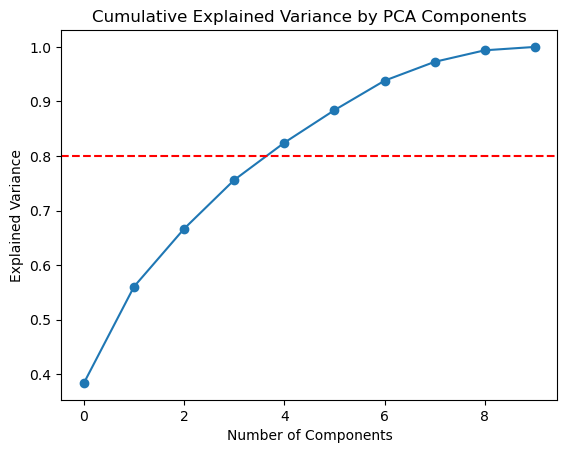

In [76]:
import matplotlib.pyplot as plt
import numpy as np

cum_var = np.cumsum(explained_variance)

plt.plot(cum_var, marker="o")
plt.axhline(0.8, color="red", linestyle="--")
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.show()


#### Find Optimal Number of Clusters (Elbow Method)

c:\Users\X421IA\anaconda3\envs\spotify_py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\X421IA\anaconda3\envs\spotify_py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\X421IA\anaconda3\envs\spotify_py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\X421IA\anaconda3\envs\spotify_py311\Lib\site-packages\sklearn\clust

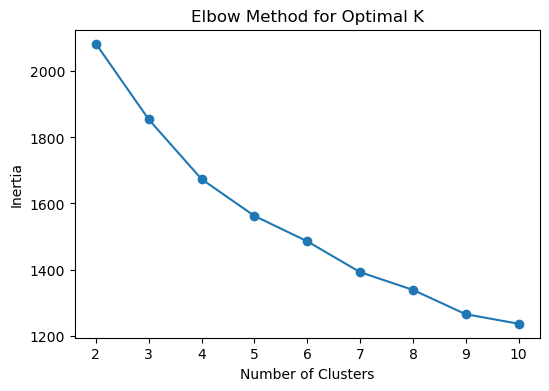

In [77]:
from sklearn.cluster import KMeans
    
inertias = []
kranges = range(2, 11)
for k in kranges:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(kranges, inertias, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()



The elbow method suggests that the optimal number of clusters lies around k = 4–5, where the marginal gain in inertia reduction starts to diminish.

c:\Users\X421IA\anaconda3\envs\spotify_py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\X421IA\anaconda3\envs\spotify_py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\X421IA\anaconda3\envs\spotify_py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\X421IA\anaconda3\envs\spotify_py311\Lib\site-packages\sklearn\clust

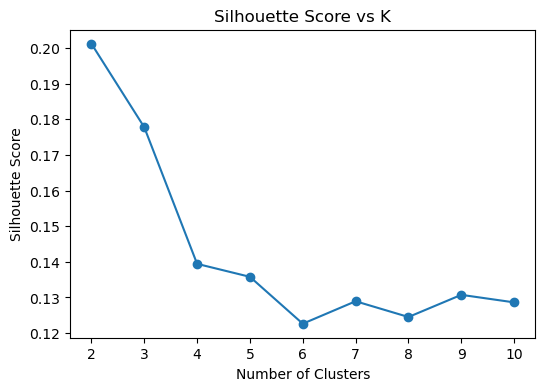

In [78]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), sil_scores, marker="o")
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


### Choosing the Optimal Number of Clusters
#### Elbow Method
The inertia curve shows a sharp decrease between k = 2 and k = 4, followed by a slower reduction for higher values of k. This indicates diminishing returns in variance reduction beyond k ≈ 4–5. Therefore, the elbow point is identified around k = 4.
#### Silhouette Score
The silhouette score reaches its maximum at k = 2 and gradually decreases for larger k. While k = 2 provides the clearest separation between clusters, it is likely too coarse to capture the diversity of tennis playing styles. For k ≥ 4, silhouette scores remain stable, suggesting that cluster structure is still meaningful despite being less separated.
#### Final decision
Considering both metrics and the interpretability of the clusters, k = 5 was selected as a compromise between cluster quality and analytical richness. This choice allows for a more nuanced segmentation of players while maintaining reasonable cluster cohesion and separation.

#### Fit KMeans with k=5

In [79]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=20)
X['cluster'] = kmeans.fit_predict(X_scaled)

X.head()

c:\Users\X421IA\anaconda3\envs\spotify_py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\X421IA\AppData\Local\Temp\ipykernel_30808\1320273777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.fit_predict(X_scaled)


,win_rate,avg_aces,avg_double_faults,avg_bp_faced,avg_rank,avg_age,avg_height,Winrate_Clay,Winrate_Grass,Winrate_Hard,cluster
0,0.718750,9.059299,4.005391,5.420485,7.234375,23.562500,198.0,0.758333,0.590909,0.710744,0
1,0.390625,22.296875,4.968750,4.125000,101.296875,39.921875,208.0,0.428571,0.400000,0.375000,2
2,0.816327,8.478261,1.673913,4.239130,3.299320,37.606803,185.0,0.705882,0.848485,0.824742,0
3,0.405797,11.733333,4.244444,6.607407,108.391304,38.347101,188.0,0.333333,0.531250,0.381579,4
4,0.295455,4.840909,3.272727,8.431818,96.022727,37.022727,183.0,0.166667,0.200000,0.428571,1


In [80]:
cluster_sizes = X["cluster"].value_counts().sort_index()
cluster_sizes


cluster
0    37
1    76
2    11
3    80
4    68
Name: count, dtype: int64

In [81]:
players_profile = X.groupby("cluster").mean()
players_profile = players_profile.round(3)
players_profile.to_csv("../data/processed/player_clusters_profile.csv")


C:\Users\X421IA\AppData\Local\Temp\ipykernel_30808\3712904690.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["pca_1"] = X_pca[:, 0] # X_pca is a 2D array with shape (n_samples, 2); a matrix


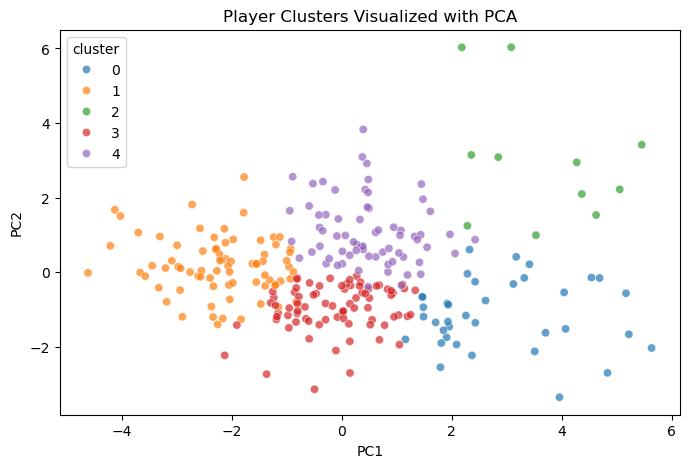

In [82]:
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X["pca_1"] = X_pca[:, 0] # X_pca is a 2D array with shape (n_samples, 2); a matrix
X["pca_2"] = X_pca[:, 1]

plt.figure(figsize=(8,5))
sns.scatterplot(data=X, x="pca_1", y="pca_2", hue="cluster", palette="tab10", alpha=0.7)
plt.title("Player Clusters Visualized with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [83]:
X.round(3)


,win_rate,avg_aces,avg_double_faults,avg_bp_faced,avg_rank,avg_age,avg_height,Winrate_Clay,Winrate_Grass,Winrate_Hard,cluster,pca_1,pca_2
0,0.719,9.059,4.005,5.420,7.234,23.562,198.0,0.758,0.591,0.711,0,4.538,-0.138
1,0.391,22.297,4.969,4.125,101.297,39.922,208.0,0.429,0.400,0.375,2,3.081,6.033
2,0.816,8.478,1.674,4.239,3.299,37.607,185.0,0.706,0.848,0.825,0,5.219,-1.659
3,0.406,11.733,4.244,6.607,108.391,38.347,188.0,0.333,0.531,0.382,4,0.482,2.488
4,0.295,4.841,3.273,8.432,96.023,37.023,183.0,0.167,0.200,0.429,1,-1.974,0.881
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.375,3.656,3.062,9.562,87.031,19.109,178.0,0.462,0.333,0.312,3,-1.908,-1.413
268,0.581,6.537,3.415,6.049,82.419,19.026,185.0,0.692,0.000,0.571,3,1.250,-1.136
269,0.267,2.800,2.667,8.600,243.267,18.073,180.0,0.000,0.267,0.308,1,-3.572,-0.103
270,0.509,10.545,4.618,6.345,63.509,20.540,193.0,0.222,0.400,0.585,4,1.610,1.635


### Clusters Interpretation

#### Cluster 0 — “Elite All-Rounders”
High-performing; balanced players; strong across surfaces; technically solid; top-level ATP players
* win_rate: 0.64 (highest)
* avg_rank: 52 (best)
* height: 189.8 cm (tall)
* balanced surface win rates
* solid aces (6.3)
* low double faults

#### Cluster 1 — “Struggling / Low-Tier Players”
Lower-ranked players; often lose matches; weak surface specialization; likely Challenger-level players
* win_rate: 0.33 (worst)
* avg_rank: 158 (worst)
* low win rates on all surfaces
* average height
* high bp_faced (defensive weakness)

#### Cluster 2 — “Big Servers / Power Specialists”
Pure serve-dominant players; very tall; high-risk, high-reward style; especially strong on grass
* avg_aces: 16.4 (INSANE)
* height: 200 cm (tallest)
* avg_double_faults: high
* grass winrate: 0.63 (highest)
* small cluster (11 players)

#### Cluster 3 — “Average Baseliners”
Typical baseline players; not elite, not weak; rely on rallies, not serve; medium performance
* win_rate: 0.47 (medium)
* avg_rank: 85 (mid-level)
* low aces
* average height
* weaker on grass
* balanced clay/hard

#### Cluster 4 — “Aggressive Mid-Tier Players // Challengers”
Aggressive style; risky serve; not elite, but dangerous; mid-ranked
* avg_aces: 8.1 (high)
* double faults: high
* avg_rank: 102
* win_rate: 0.44
* height: 190 cm

